In [102]:
import pandas as pd

In [103]:

%pwd
%cd /Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON

/Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON


In [104]:
meta_data = pd.read_csv("META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
meta_data.head()

,Unnamed: 0,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",...,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status
0,sub-032311,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No
1,sub-032309,2,20-25,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes
2,sub-032382,2,25-30,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes
3,sub-032302,1,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No
4,sub-032315,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No


In [105]:
anthropometry = pd.read_csv("Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv")
anthropometry["BMI"] = anthropometry["Weight_kg"]/((anthropometry["Height_cm"]/100)**2)
anthropometry.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
count,228.000000,228.000000,227.000000,227.000000,228.000000
mean,174.759211,74.099079,84.362115,95.362996,24.232279
std,10.236729,13.054842,12.049521,9.958975,3.634442
min,145.000000,48.000000,60.000000,70.000000,17.930787
25%,167.425000,64.250000,75.800000,89.250000,21.545560
50%,175.000000,72.850000,83.000000,95.000000,23.664355
75%,182.825000,82.650000,92.000000,101.000000,26.076901
max,199.500000,113.900000,127.000000,126.000000,36.649262


<AxesSubplot:>

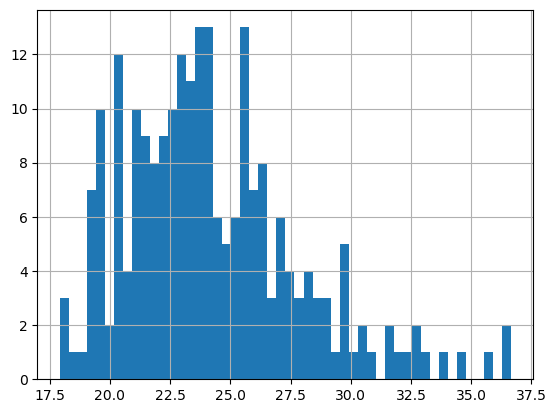

In [106]:
anthropometry["BMI"].hist(bins=50)

In [107]:
anthropometry

,Unnamed: 0,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
0,sub-032301,162.0,78.00,97.0,111.0,29.721079
1,sub-032302,164.5,64.30,70.0,102.0,23.761791
2,sub-032303,166.5,101.60,113.0,123.0,36.649262
3,sub-032304,184.6,87.60,95.0,93.5,25.706368
4,sub-032305,171.5,71.19,83.0,107.0,24.204201
...,...,...,...,...,...,...
223,sub-032524,182.2,69.70,75.5,98.0,20.995974
224,sub-032525,175.8,72.50,75.6,85.0,23.458501
225,sub-032526,186.2,90.40,93.0,107.0,26.074085
226,sub-032527,192.1,87.40,84.0,91.0,23.684090


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [109]:
cognitive_tests_path = "Cognitive_Test_Battery_LEMON"
emotion_personality_tests_path = "Emotion_and_Personality_Test_Battery_LEMON"
cognitive_tests_folders = os.listdir(cognitive_tests_path)
for i in cognitive_tests_folders:
    if i == '.DS_Store':
        cognitive_tests_folders.remove(i)
cognitive_tests_path_full = [os.path.join(cognitive_tests_path, s) for s in cognitive_tests_folders]
tests_path_full = cognitive_tests_path_full + [emotion_personality_tests_path]
df_list = []
for folder in tests_path_full:
    for file in os.listdir(folder):
        if '.' in file:
            if file.split('.')[1] == 'csv':
                filepath = os.path.join(folder, file)
                df_list.append(pd.read_csv(filepath))

data = anthropometry
data = data.rename(columns={'Unnamed: 0':'id'}).set_index('id')
count = 0
for dataset in df_list:
    dataset = dataset.rename(columns={'Unnamed: 0':'id'})
    data = data.join(dataset.set_index('id'))
    count += 1

In [110]:
data.head()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_3,TAP_WM_4,TAP_WM_5,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
id,,,,,,,,,,,,,,,,,,,,,
sub-032301,162.0,78.00,97.0,111.0,29.721079,575.0,436.0,93,219.0,46,...,4.0,2.0,6.0,4.0,7.0,6.0,3.0,4.0,2.0,7.0
sub-032302,164.5,64.30,70.0,102.0,23.761791,705.0,678.0,18,279.0,18,...,3.0,5.0,6.0,3.0,7.0,6.0,4.0,4.0,5.0,6.0
sub-032303,166.5,101.60,113.0,123.0,36.649262,450.0,424.0,95,122.0,88,...,2.0,2.0,8.0,7.0,8.0,5.0,6.0,3.0,4.0,7.0
sub-032304,184.6,87.60,95.0,93.5,25.706368,847.0,781.0,10,209.0,34,...,3.0,2.0,7.0,6.0,7.0,7.0,5.0,3.0,6.0,7.0
sub-032305,171.5,71.19,83.0,107.0,24.204201,461.0,405.0,90,126.0,73,...,4.0,2.0,5.0,5.0,6.0,4.0,4.0,2.0,2.0,7.0


In [111]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 262 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Height_cm                      float64
 1    Weight_kg                      float64
 2    Waist_cm                       float64
 3    Hip_cm                         float64
 4    BMI                            float64
 5    TAP_WM_1                       float64
 6    TAP_WM_2                       float64
 7    TAP_WM_3                       object 
 8    TAP_WM_4                       float64
 9    TAP_WM_5                       object 
 10   TAP_WM_6                       int64  
 11   TAP_WM_7                       int64  
 12   TAP_WM_8                       object 
 13   TAP_WM_9                       int64  
 14   TAP_WM_10                      object 
 15   TAP_WM_11                      int64  
 16   TAP_WM_12                      object 
 17   TAP_A_1               

In [112]:
data._get_numeric_data().info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 219 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       227 non-null    float64
 3    Hip_cm                         227 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       227 non-null    float64
 6    TAP_WM_2                       227 non-null    float64
 7    TAP_WM_4                       227 non-null    float64
 8    TAP_WM_6                       228 non-null    int64  
 9    TAP_WM_7                       228 non-null    int64  
 10   TAP_WM_9                       228 non-null    int64  
 11   TAP_WM_11                      228 non-null    int64  
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_15966/493814805.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [113]:
data_num = data._get_numeric_data()

In [114]:
[data.shape, data_num.shape]

[(228, 262), (228, 219)]

In [115]:
# Replace NAs with medians

for col in data_num.columns:
    median = data_num[col].median()
    data_num[col].fillna(median, inplace=True)

data_num.shape

(228, 219)

In [116]:
data_num.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,174.759211,74.099079,84.356140,95.361404,24.232279,581.79386,547.346491,181.100877,13.070175,2.157895,...,4.048246,2.710526,5.486842,4.263158,6.197368,5.456140,4.565789,2.723684,3.078947,5.701754
std,10.236729,13.054842,12.023289,9.937044,3.634442,156.25089,154.677006,88.119629,2.475321,3.025818,...,1.534435,1.158943,1.708956,1.314458,1.198601,1.493837,1.487115,1.339985,1.206770,1.303535
min,145.000000,48.000000,60.000000,70.000000,17.930787,92.00000,315.000000,21.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,167.425000,64.250000,75.900000,89.375000,21.545560,471.00000,435.500000,121.000000,12.000000,0.000000,...,3.000000,2.000000,4.000000,3.000000,5.750000,4.000000,4.000000,2.000000,2.000000,5.000000
50%,175.000000,72.850000,83.000000,95.000000,23.664355,557.00000,524.000000,163.000000,14.000000,1.000000,...,4.000000,2.000000,6.000000,4.000000,6.000000,6.000000,4.000000,2.000000,3.000000,6.000000
75%,182.825000,82.650000,92.000000,101.000000,26.076901,673.50000,627.250000,225.250000,15.000000,3.000000,...,5.000000,3.000000,7.000000,5.000000,7.000000,6.000000,5.250000,3.000000,4.000000,7.000000
max,199.500000,113.900000,127.000000,126.000000,36.649262,1244.00000,1229.000000,491.000000,15.000000,15.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


# Scale data for PCA [0,1]

data_num_tr = pd.DataFrame()
for col in data_num.columns:
    min = data_num[col].min()
    max = data_num[col].max()
    range = max - min
    for ind in data_num.index:
        x = data_num.loc[ind, col]
        z = (x - min)/range
        data_num_tr[ind, col] = z
        print(data_num_tr[ind, col])

data_num_tr.describe()

def transform_for_pca(series):
    min = series.min()
    max = series.max()
    range = max - min
    for ind 

data_num_tr = 

In [117]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(data_num)

X.shape

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning:

invalid value encountered in divide

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning:

invalid value encountered in divide

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning:

invalid value encountered in divide



(228, 219)

In [118]:
data_num_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

In [119]:
data_num_tr.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,...,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,2.039304e-15,6.710032e-16,-3.145632e-16,-1.296660e-15,-3.817609e-16,-3.057983e-16,2.573477e-16,-1.283619e-16,-8.667531e-17,-4.674623e-17,...,2.964247e-16,-2.950856e-16,1.636118e-16,-3.691005e-16,-2.208273e-16,2.198534e-16,-2.848599e-17,-6.817159e-17,-1.821155e-16,-3.135893e-16
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,...,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00
min,-2.913498e+00,-2.003586e+00,-2.030204e+00,-2.557823e+00,-1.737641e+00,-3.141560e+00,-1.505445e+00,-1.820856e+00,-5.291812e+00,-7.147298e-01,...,-1.337790e+00,-6.144303e-01,-2.044824e+00,-1.725531e+00,-3.509594e+00,-2.318690e+00,-1.729143e+00,-5.412571e-01,-8.960456e-01,-2.846029e+00
25%,-7.180367e-01,-7.560987e-01,-7.048609e-01,-6.037585e-01,-7.408649e-01,-7.106368e-01,-7.246881e-01,-6.835380e-01,-4.332893e-01,-7.147298e-01,...,-6.846508e-01,-6.144303e-01,-8.719437e-01,-9.630868e-01,-3.740633e-01,-9.769101e-01,-3.812982e-01,-5.412571e-01,-8.960456e-01,-5.395316e-01
50%,2.357386e-02,-9.588988e-02,-1.130410e-01,-3.644934e-02,-1.566056e-01,-1.590289e-01,-1.512691e-01,-2.058645e-01,3.764645e-01,-3.835136e-01,...,-3.151112e-02,-6.144303e-01,3.009363e-01,-2.006431e-01,-1.650279e-01,3.648700e-01,-3.812982e-01,-5.412571e-01,-6.556431e-02,2.293009e-01
75%,7.896601e-01,6.564411e-01,6.371533e-01,5.686804e-01,5.086559e-01,5.882073e-01,5.177196e-01,5.021158e-01,7.813414e-01,2.789190e-01,...,6.216285e-01,2.503235e-01,8.873763e-01,5.618006e-01,6.711135e-01,3.648700e-01,4.611048e-01,2.066618e-01,7.649169e-01,9.981334e-01
max,2.422182e+00,3.055456e+00,3.554575e+00,3.090055e+00,3.423992e+00,4.247420e+00,4.416644e+00,3.524538e+00,7.813414e-01,4.253514e+00,...,2.581047e+00,4.574092e+00,1.473816e+00,2.849132e+00,1.507255e+00,1.706650e+00,2.314391e+00,3.946257e+00,4.086842e+00,1.766966e+00


In [120]:
data_num_tr.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 219 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       228 non-null    float64
 3    Hip_cm                         228 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       228 non-null    float64
 6    TAP_WM_2                       228 non-null    float64
 7    TAP_WM_4                       228 non-null    float64
 8    TAP_WM_6                       228 non-null    float64
 9    TAP_WM_7                       228 non-null    float64
 10   TAP_WM_9                       228 non-null    float64
 11   TAP_WM_11                      228 non-null    float64
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_15966/290913772.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [121]:
data_num_tr.drop(columns=['YFAS_control', 'YFAS_attempts', 'YFAS_time',
                         'YFAS_activities', 'YFAS_problems', 'YFAS_tolerance',
                         'YFAS_withdrawal', 'YFAS_impairment', 'YFAS_symptom_count',
                         'YFAS_diagnosis', 'Unnamed: 32'], inplace=True)

In [122]:
data_num_tr.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 208 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       228 non-null    float64
 3    Hip_cm                         228 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       228 non-null    float64
 6    TAP_WM_2                       228 non-null    float64
 7    TAP_WM_4                       228 non-null    float64
 8    TAP_WM_6                       228 non-null    float64
 9    TAP_WM_7                       228 non-null    float64
 10   TAP_WM_9                       228 non-null    float64
 11   TAP_WM_11                      228 non-null    float64
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_15966/290913772.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [123]:
# Had to install plotly through conda as it didn't work through pip

import sys
!conda install --yes --prefix {'/opt/homebrew/opt/python@3.9/Frameworks/Python.framework/Versions/3.9'} plotly

import plotly.express as px
from sklearn.decomposition import PCA


DirectoryNotACondaEnvironmentError: The target directory exists, but it is not a conda environment.
Use 'conda create' to convert the directory to a conda environment.
  target directory: /opt/homebrew/opt/python@3.9/Frameworks/Python.framework/Versions/3.9




In [124]:
sys.prefix

'/Users/artemii/opt/anaconda3/envs/juselius22'

In [125]:
pca = PCA(n_components=2)
components = pca.fit_transform(data_num_tr)
fig = px.scatter_matrix(components,
                       dimensions=range(2),
                        color=bgm_cluster,
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [126]:
dir(px.colors.sequential)

['Aggrnyl',
 'Aggrnyl_r',
 'Agsunset',
 'Agsunset_r',
 'Blackbody',
 'Blackbody_r',
 'Bluered',
 'Bluered_r',
 'Blues',
 'Blues_r',
 'Blugrn',
 'Blugrn_r',
 'Bluyl',
 'Bluyl_r',
 'Brwnyl',
 'Brwnyl_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'Burg',
 'Burg_r',
 'Burgyl',
 'Burgyl_r',
 'Cividis',
 'Cividis_r',
 'Darkmint',
 'Darkmint_r',
 'Electric',
 'Electric_r',
 'Emrld',
 'Emrld_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Hot',
 'Hot_r',
 'Inferno',
 'Inferno_r',
 'Jet',
 'Jet_r',
 'Magenta',
 'Magenta_r',
 'Magma',
 'Magma_r',
 'Mint',
 'Mint_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'Oryel',
 'Oryel_r',
 'Peach',
 'Peach_r',
 'Pinkyl',
 'Pinkyl_r',
 'Plasma',
 'Plasma_r',
 'Plotly3',
 'Plotly3_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuRd',
 'PuRd_r',
 'Purp',
 'Purp_r',
 'Purples',
 'Purples_r',
 'Purpor',
 'Purpor_r',
 'Rainbow',
 'Rainbow_r',
 'RdBu',
 'RdBu_r',
 'RdPu',
 'RdPu_r',
 'Redor',
 'Redor_r',
 'Reds',
 'Reds_r',
 'Sunset

In [127]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [128]:
import plotly.io as pio
pio.kaleido.scope.default_width = 1200
pio.kaleido.scope.default_height = 700

os.makedirs("plots", exist_ok=True)
fig.write_image('plots/mind-brain-body-pca-waist.svg')

In [129]:
relevant_features = pd.DataFrame(pca.components_, columns=data_num_tr.columns, index=['PC1', 'PC2'])

In [130]:
relevant_features

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
PC1,-0.038197,0.055684,0.116067,0.084461,0.095691,0.084276,0.079459,0.052429,-0.084912,0.078688,...,-0.056584,-0.081163,-0.032193,-0.042016,-0.029650,0.002727,-0.055478,0.031825,-0.018574,0.020990
PC2,-0.040193,-0.010423,0.042846,0.035892,0.019110,0.042615,0.037246,0.032523,-0.068943,0.069808,...,-0.057363,0.045395,-0.080174,-0.002728,-0.060571,-0.018179,0.072679,0.033523,0.087421,-0.083787


In [131]:
relevant_features.idxmax(axis=1)

PC1               TAP_I_8
PC2    STAI_Trait_Anxiety
dtype: object

In [132]:
relevant_features_pc1_sorted = relevant_features.transpose().sort_values('PC1', ascending=False)
relevant_features_pc1_sorted.head(20)

,PC1,PC2
TAP_I_8,0.138931,0.083439
TAP_I_9,0.138299,0.079749
TAP_A_5,0.136630,0.060197
TMT_6,0.135815,0.096694
TAP_I_15,0.135355,0.066235
TAP_A_6,0.134241,0.060816
TAP_I_16,0.133451,0.067200
TAP_A_10,0.133281,0.057977
TAP_A_11,0.129601,0.056234
TAP_A_2,0.127693,0.052220


In [133]:
relevant_features_pc2_sorted = relevant_features.transpose().sort_values('PC2', ascending=False)
relevant_features_pc2_sorted.head(20)

,PC1,PC2
STAI_Trait_Anxiety,-0.124360,0.149617
NEOFFI_Neuroticism,-0.111476,0.140867
TAS_OverallScore,-0.075459,0.137406
LOT_Pessimism,-0.028992,0.125836
TAS_Identification,-0.078122,0.124887
TICS_ScreeningScale,-0.119514,0.117069
TICS_WorkDemands,-0.102116,0.113274
CERQ_Catastrophizing,-0.019579,0.111978
UPPS_urgency,-0.083078,0.109912
TMT_1,0.108631,0.106332


In [34]:
os.makedirs("processed_data", exist_ok=True)
relevant_features_pc1_sorted.to_csv('processed_data/relevant_features_pc1_sorted.csv')
relevant_features_pc2_sorted.to_csv('processed_data/relevant_features_pc2_sorted.csv')

In [35]:
fig

In [134]:
sys.version

'3.10.6 (main, Oct 24 2022, 11:04:34) [Clang 12.0.0 ]'

In [135]:
%cd /Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/
DATA_FOLDER = '/Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON'

/Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts


In [138]:
# Clustering using Bayesian Gaussian Mixture Model

from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10,
                              n_init=10,
                              covariance_type="full",
                              weight_concentration_prior=10,
                              init_params="k-means++")

In [139]:
bgm.fit(data_num_tr)
np.round(bgm.weights_, 2)

array([0.07, 0.11, 0.09, 0.15, 0.08, 0.08, 0.13, 0.07, 0.11, 0.11])

In [140]:
bgm.converged_

True

In [141]:
dir(bgm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_initial_parameters',
 '_check_means_parameters',
 '_check_n_features',
 '_check_parameters',
 '_check_precision_parameters',
 '_check_weights_parameters',
 '_checkcovariance_prior_parameter',
 '_compute_lower_bound',
 '_e_step',
 '_estimate_log_prob',
 '_estimate_log_prob_resp',
 '_estimate_log_weights',
 '_estimate_means',
 '_estimate_precisions',
 '_estimate_weighted_log_prob',
 '_estimate_weights',
 '_estimate_wishart_diag',
 '_estimate_wishart_full',
 '_estimate_wishart_spherical',
 '_estimate_wishart_tied',
 '_est

In [142]:
bgm_cluster = bgm.predict(data_num_tr)

In [143]:
bgm_cluster

array([2, 3, 1, 3, 8, 3, 6, 2, 3, 9, 0, 6, 1, 6, 6, 3, 4, 6, 1, 2, 1, 4,
       8, 9, 4, 1, 6, 7, 4, 8, 6, 8, 2, 1, 5, 1, 9, 8, 5, 2, 0, 2, 9, 6,
       8, 8, 3, 8, 4, 6, 0, 7, 4, 9, 2, 7, 6, 8, 6, 3, 7, 9, 5, 0, 1, 0,
       4, 6, 6, 3, 3, 0, 1, 5, 8, 7, 3, 3, 1, 0, 6, 2, 5, 9, 6, 1, 9, 9,
       9, 0, 8, 5, 8, 4, 2, 7, 5, 1, 2, 3, 8, 6, 5, 3, 9, 6, 0, 1, 9, 6,
       7, 8, 8, 0, 3, 1, 8, 3, 9, 2, 4, 6, 8, 3, 6, 1, 2, 9, 4, 5, 9, 2,
       9, 4, 0, 2, 2, 5, 7, 9, 8, 0, 8, 2, 8, 3, 5, 6, 3, 9, 5, 4, 2, 8,
       8, 3, 6, 4, 9, 1, 2, 4, 1, 3, 9, 7, 6, 7, 3, 2, 1, 0, 5, 1, 3, 9,
       3, 3, 5, 1, 3, 7, 3, 4, 9, 2, 1, 5, 4, 7, 1, 7, 8, 9, 3, 2, 8, 3,
       4, 3, 5, 3, 1, 9, 3, 7, 6, 1, 3, 3, 6, 0, 0, 4, 8, 3, 9, 5, 6, 9,
       7, 1, 6, 9, 8, 6, 3, 6])

In [146]:

data_bgm_clustered = data_num.copy()
data_bgm_clustered['bgm_cluster'] = bgm_cluster
data_bgm_clustered

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping,bgm_cluster
id,,,,,,,,,,,,,,,,,,,,,
sub-032301,162.0,78.00,97.0,111.0,29.721079,575.0,436.0,219.0,11,3,...,2.0,6.0,4.0,7.0,6.0,3.0,4.0,2.0,7.0,2
sub-032302,164.5,64.30,70.0,102.0,23.761791,705.0,678.0,279.0,14,3,...,5.0,6.0,3.0,7.0,6.0,4.0,4.0,5.0,6.0,3
sub-032303,166.5,101.60,113.0,123.0,36.649262,450.0,424.0,122.0,14,1,...,2.0,8.0,7.0,8.0,5.0,6.0,3.0,4.0,7.0,1
sub-032304,184.6,87.60,95.0,93.5,25.706368,847.0,781.0,209.0,12,11,...,2.0,7.0,6.0,7.0,7.0,5.0,3.0,6.0,7.0,3
sub-032305,171.5,71.19,83.0,107.0,24.204201,461.0,405.0,126.0,15,2,...,2.0,5.0,5.0,6.0,4.0,4.0,2.0,2.0,7.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-032524,182.2,69.70,75.5,98.0,20.995974,528.0,532.0,151.0,15,2,...,2.0,6.0,4.0,6.0,6.0,6.0,2.0,2.0,4.0,9
sub-032525,175.8,72.50,75.6,85.0,23.458501,585.0,547.0,127.0,15,1,...,2.0,4.0,3.0,7.0,6.0,7.0,2.0,3.0,5.0,8
sub-032526,186.2,90.40,93.0,107.0,26.074085,564.0,553.0,177.0,10,3,...,4.0,4.0,2.0,3.0,5.0,3.0,2.0,2.0,4.0,6


In [147]:
data_bgm_clustered.groupby('bgm_cluster', as_index=False)['BMI', 'Waist_cm'].agg('median')

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_15966/844293700.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bgm_cluster,BMI,Waist_cm
0,0,24.609786,87.00
1,1,22.951595,84.00
2,2,24.676041,88.00
3,3,23.655986,78.30
4,4,22.459971,80.75
5,5,25.368990,84.50
6,6,23.468269,80.50
7,7,24.037299,80.50
8,8,24.811673,85.50
9,9,23.312965,78.80


In [159]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression()
lin_reg.fit(data_num_tr, bgm_cluster)

LogisticRegression()

In [166]:
prob_array = lin_reg.coef_

In [211]:
highest_weight_clusters = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])[np.round(bgm.weights_, 2) > 0.1]
highest_weight_clusters = list(highest_weight_clusters)

logreg_coef_df = pd.DataFrame(prob_array, columns = data_num_tr.columns)

max_coef_features = list(logreg_coef_df.idxmax(axis=1))
min_coef_features = list(logreg_coef_df.idxmin(axis=1))

In [212]:
feature_coef_by_cluster_max = data_bgm_clustered.groupby('bgm_cluster', as_index=False)[max_coef_features + ['BMI']].agg('median')

In [213]:
feature_coef_by_cluster_min = data_bgm_clustered.groupby('bgm_cluster', as_index=False)[min_coef_features + ['BMI']].agg('median')

In [214]:
# Clusters with highest weights 1, 3, 6, 8, 9

In [215]:
feature_coef_by_cluster_max.iloc[highest_weight_clusters, :]

,bgm_cluster,COPE_Acceptance,CVLT_1,NEOFFI_Extraversion,TAP_WM_11,FSoZu_Zuf,NYC-Q_lemon_21,TeiQueSF_sociability,RWT_1,TICS_WorkDiscontent,TAP_I_24,BMI
1,1,6.0,1.0,2.500000,0.0,3.5,2.0,5.000000,15.0,10.0,0.837,22.951595
3,3,6.0,1.0,2.416667,1.0,3.5,2.0,4.833333,15.0,10.0,1.002,23.655986
6,6,6.0,1.0,2.416667,0.0,3.5,2.0,5.166667,15.0,11.0,0.858,23.468269
8,8,6.0,1.0,2.500000,0.0,4.0,1.0,4.833333,13.5,11.0,0.977,24.811673
9,9,6.0,1.0,2.333333,0.0,3.5,3.0,5.000000,13.0,9.0,1.179,23.312965


In [216]:
feature_coef_by_cluster_min.iloc[highest_weight_clusters, :]

,bgm_cluster,MDBF_Day2_WM_Scale,MARS_Cognitive_Distraction,TICS_PressuereToPerform,COPE_Humor,CERQ_Acceptance,MDBF_Day2_GS_Scale,NYC-Q_lemon_14,COPE_activeCoping,NYC-Q_lemon_18,TAP_WM_11,BMI
1,1,33.0,3.0,11.0,4.0,7.0,35.0,6.0,6.0,1.0,0.0,22.951595
3,3,33.0,3.6,16.0,4.0,7.0,35.0,6.0,6.0,2.0,1.0,23.655986
6,6,28.0,3.6,16.0,4.0,8.0,35.0,5.0,6.0,2.0,0.0,23.468269
8,8,33.5,3.4,15.5,4.0,7.0,36.0,5.0,6.0,1.0,0.0,24.811673
9,9,33.0,3.6,15.0,4.0,7.0,34.0,7.0,6.0,2.0,0.0,23.312965


In [204]:
max_coef_features + ['BMI']

0         COPE_AcceptanceBMI
1                  CVLT_1BMI
2     NEOFFI_ExtraversionBMI
3               TAP_WM_11BMI
4               FSoZu_ZufBMI
5          NYC-Q_lemon_21BMI
6    TeiQueSF_sociabilityBMI
7                   RWT_1BMI
8     TICS_WorkDiscontentBMI
9                TAP_I_24BMI
dtype: object

In [210]:
type(min_coef_features)

list

In [217]:
feature_coef_by_cluster_max

,bgm_cluster,COPE_Acceptance,CVLT_1,NEOFFI_Extraversion,TAP_WM_11,FSoZu_Zuf,NYC-Q_lemon_21,TeiQueSF_sociability,RWT_1,TICS_WorkDiscontent,TAP_I_24,BMI
0,0,6.0,1.0,2.416667,0.0,3.00,1.0,4.666667,14.0,11.0,0.7070,24.609786
1,1,6.0,1.0,2.500000,0.0,3.50,2.0,5.000000,15.0,10.0,0.8370,22.951595
2,2,6.0,1.0,2.833333,0.0,4.00,2.0,5.166667,13.0,8.0,0.4170,24.676041
3,3,6.0,1.0,2.416667,1.0,3.50,2.0,4.833333,15.0,10.0,1.0020,23.655986
4,4,5.0,1.0,2.500000,0.0,4.25,3.5,4.916667,14.5,10.0,1.4745,22.459971
5,5,6.0,1.0,2.333333,0.0,4.00,3.0,4.833333,12.0,10.0,1.4910,25.368990
6,6,6.0,1.0,2.416667,0.0,3.50,2.0,5.166667,15.0,11.0,0.8580,23.468269
7,7,5.0,1.0,2.500000,0.0,4.00,3.0,4.500000,17.0,8.0,2.0730,24.037299
8,8,6.0,1.0,2.500000,0.0,4.00,1.0,4.833333,13.5,11.0,0.9770,24.811673
9,9,6.0,1.0,2.333333,0.0,3.50,3.0,5.000000,13.0,9.0,1.1790,23.312965


In [224]:
os.makedirs("processed_data", exist_ok=True)
data_bgm_clustered.to_csv("processed_data/clustered_behavioral_LEMON.csv")